In [1]:
import yfinance as yf
import pandas as pd


In [2]:
# Define your portfolio
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']


In [6]:
# Download historical price data
data = yf.download(tickers, start="2022-01-01", end="2025-01-01", auto_adjust=True)


[*********************100%***********************]  5 of 5 completed


In [7]:
# Keep only the 'Close' prices (since auto_adjust=True already accounts for splits/dividends)
close_prices = data['Close'] if isinstance(data.columns, pd.MultiIndex) else data

In [9]:
# Save data to CSV
close_prices.to_csv("portfolio_prices.csv")


In [10]:
# Show the last few rows
print(close_prices.tail())


Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2024-12-24  257.578674  229.050003  195.884399  437.647400  462.279999
2024-12-26  258.396667  227.050003  195.375000  436.432068  454.130005
2024-12-27  254.974930  223.750000  192.538254  428.881104  431.660004
2024-12-30  251.593079  221.300003  191.020004  423.202911  417.410004
2024-12-31  249.817368  219.389999  189.082245  419.885681  403.839996


# Step 2: Calculate Returns, Volatility & Correlation Matrix
#This step will:
#Compute daily returns for each stock
#Show their standard deviation (volatility)
#Create a correlation heatmap

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
# Load your price data (in case you're starting a new session)
close_prices = pd.read_csv("portfolio_prices.csv", index_col=0, parse_dates=True)


In [13]:
# Calculate daily returns
returns = close_prices.pct_change().dropna()


In [14]:
# Show average return and volatility
mean_returns = returns.mean() * 252  # Annualized
volatility = returns.std() * np.sqrt(252)  # Annualized

In [15]:
print("Average Annual Returns:\n", mean_returns)
print("\nAnnual Volatility:\n", volatility)


Average Annual Returns:
 AAPL     0.148965
AMZN     0.158071
GOOGL    0.144144
MSFT     0.123791
TSLA     0.190221
dtype: float64

Annual Volatility:
 AAPL     0.270935
AMZN     0.383321
GOOGL    0.327441
MSFT     0.275766
TSLA     0.613038
dtype: float64


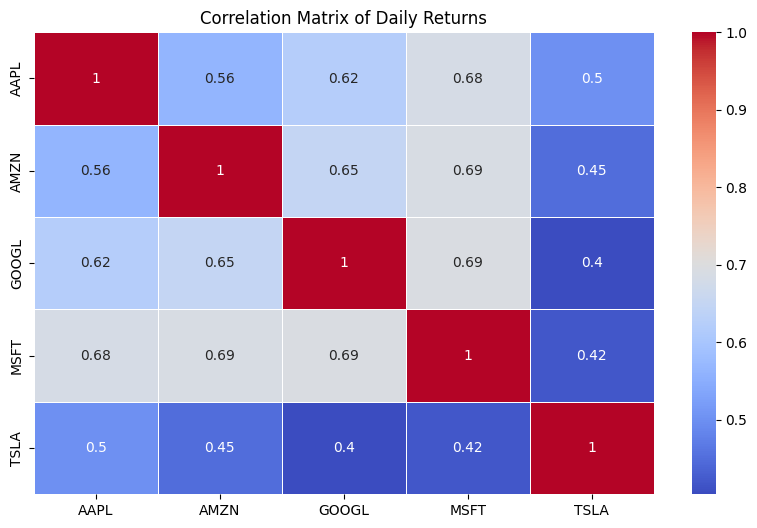

In [16]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

# What You'll Learn:
#Which stocks are most/least correlated (important for diversification)
#Volatility insights – useful for Value at Risk (VaR) later
#Sets up the math for portfolio optimization in Step 3

In [34]:
import numpy as np

In [35]:
import pandas as pd

# Load your saved price data
close_prices = pd.read_csv("portfolio_prices.csv", index_col=0, parse_dates=True)

In [36]:

# Extract ticker names
tickers = close_prices.columns

In [37]:
# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

In [38]:
tickers = close_prices.columns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()


In [39]:
num_portfolios = 10_000
all_weights = []  # list to collect weights
ret_arr = []
vol_arr = []
sharpe_arr = []

In [40]:
# Convert lists to NumPy arrays
ret_arr = np.array(ret_arr)
vol_arr = np.array(vol_arr)
sharpe_arr = np.array(sharpe_arr)
all_weights = np.array(all_weights)

In [41]:
num_portfolios = 10_000
all_weights = []  # Keep as a list
ret_arr = []
vol_arr = []
sharpe_arr = []

np.random.seed(42)

for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    

    
    expected_return = np.sum(weights * log_returns.mean()) * 252
    ret_arr.append(expected_return)
    
    expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    vol_arr.append(expected_vol)
    
    sharpe_arr.append(expected_return / expected_vol)



In [42]:

# Assuming close_prices is already defined
tickers = close_prices.columns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Parameters
num_portfolios = 10000
all_weights = []
ret_arr = []
vol_arr = []
sharpe_arr = []

np.random.seed(42)  # for reproducibility

# Portfolio simulation
for _ in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    all_weights.append(weights)

    expected_return = np.sum(weights * log_returns.mean()) * 252
    ret_arr.append(expected_return)

    expected_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    vol_arr.append(expected_vol)

    sharpe_arr.append(expected_return / expected_vol)
    
   

# ✅ Convert to NumPy arrays ONLY AFTER the loop
all_weights = np.array(all_weights)
ret_arr = np.array(ret_arr)
vol_arr = np.array(vol_arr)
sharpe_arr = np.array(sharpe_arr)

In [43]:
# Find max Sharpe ratio portfolio
max_sr_idx = sharpe_arr.argmax()
best_weights = all_weights[max_sr_idx]

In [44]:
print("\n Optimal Portfolio (Max Sharpe Ratio):")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {best_weights[i]:.2%}")

print(f"\nExpected Return: {ret_arr[max_sr_idx]:.2%}")
print(f"Expected Volatility: {vol_arr[max_sr_idx]:.2%}")
print(f"Sharpe Ratio: {sharpe_arr[max_sr_idx]:.2f}")


 Optimal Portfolio (Max Sharpe Ratio):
AAPL: 67.13%
AMZN: 0.50%
GOOGL: 17.87%
MSFT: 13.56%
TSLA: 0.95%

Expected Return: 10.37%
Expected Volatility: 25.61%
Sharpe Ratio: 0.40


In [45]:
# Convert to numpy arrays
ret_arr = np.array(ret_arr)
vol_arr = np.array(vol_arr)
sharpe_arr = np.array(sharpe_arr)


In [46]:

# Find the max Sharpe ratio portfolio
max_sr_idx = sharpe_arr.argmax()
best_weights = all_weights[max_sr_idx]


In [47]:
print("\n✅ Optimal Portfolio (Max Sharpe Ratio):")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {best_weights[i]:.2%}")


✅ Optimal Portfolio (Max Sharpe Ratio):
AAPL: 67.13%
AMZN: 0.50%
GOOGL: 17.87%
MSFT: 13.56%
TSLA: 0.95%


In [48]:

print(f"\nExpected Return: {ret_arr[max_sr_idx]:.2%}")
print(f"Expected Volatility: {vol_arr[max_sr_idx]:.2%}")
print(f"Sharpe Ratio: {sharpe_arr[max_sr_idx]:.2f}")


Expected Return: 10.37%
Expected Volatility: 25.61%
Sharpe Ratio: 0.40


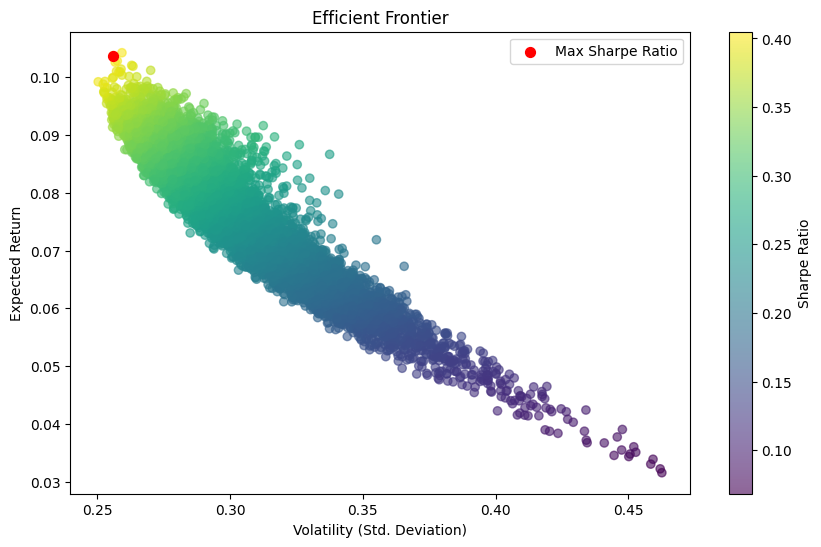

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
# Highlight max Sharpe ratio point
plt.scatter(vol_arr[max_sr_idx], ret_arr[max_sr_idx], c='red', s=50, label='Max Sharpe Ratio')
plt.legend()
plt.show()

 #Step 1: Value at Risk (VaR) — Historical & Monte Carlo

#Historical VaR (95% confidence level)
#Monte Carlo VaR (based on normal distribution of returns)
#Assumptions:
#Portfolio is already optimized (weights known)
#1-day VaR, 95% confidence level

In [50]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Tickers and weights (replace with your actual weights from optimization)
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOGL']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # equal weights or optimized weights

In [52]:
# Download price data (multi-ticker)
raw_data = yf.download(tickers, start="2022-01-01", end="2025-01-01", group_by='ticker')


[*********************100%***********************]  5 of 5 completed


In [53]:
#Run this to inspect the structure of raw_data[ticker]
print(type(raw_data[tickers[0]]))
print(raw_data[tickers[0]].head())

<class 'pandas.core.frame.DataFrame'>
Price             Open        High         Low       Close     Volume
Date                                                                 
2022-01-03  174.542932  179.499589  174.425155  178.645660  104487900
2022-01-04  179.254221  179.558489  175.809091  176.378372   99310400
2022-01-05  176.290033  176.839679  171.411899  171.686722   94537600
2022-01-06  169.507737  172.059683  168.467333  168.820679   96904000
2022-01-07  169.694241  170.921136  167.868622  168.987549   86709100


In [54]:
data = pd.DataFrame({ticker: raw_data[ticker]['Close'] for ticker in tickers})

In [55]:
# Drop missing values (e.g., holidays not common across all tickers)
data.dropna(inplace=True)

In [56]:
# Daily returns
returns = data.pct_change().dropna()

In [57]:
# Portfolio returns using weights
portfolio_returns = returns.dot(weights)

In [58]:

# Historical VaR (95%)
VaR_95_hist = np.percentile(portfolio_returns, 5)

In [59]:
# Monte Carlo VaR
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()
VaR_95_mc = np.percentile(np.random.normal(mu, sigma, 100000), 5)


In [60]:
# Output
print(f"Historical VaR (95%, 1-day): {-VaR_95_hist:.4%}")
print(f"Monte Carlo VaR (95%, 1-day): {-VaR_95_mc:.4%}")

Historical VaR (95%, 1-day): 3.2198%
Monte Carlo VaR (95%, 1-day): 3.0281%


In [61]:
#Used a dictionary comprehension to build a new DataFrame with only "Adj Close" from the multi-index data.

#This works robustly across all versions of pandas and yfinance.

